In [648]:
# ----- Lab 1 starts here (Web Scraping Single Page)

In [649]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
pd.set_option('display.max_rows', 20)

In [650]:
url = "https://www.billboard.com/charts/hot-100/"

In [651]:
response = requests.get(url)
response.status_code 

200

In [652]:
soup = BeautifulSoup(response.content, "html.parser")

In [653]:
#Title
titles = []
for title in soup.select("#title-of-a-story")[3:103]:
    titles.append(title.get_text().strip())
    
# Artist
artists = []
for artist in soup.select("li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-1\@mobile-max > span"):
    artists.append(artist.get_text().strip())
    
top100billboard = pd.DataFrame({'artist':artists,'title':titles})

In [654]:
top100billboard.head(60)

,artist,title
0,Taylor Swift,All Too Well (Taylor's Version)
1,Adele,Easy On Me
2,The Kid LAROI & Justin Bieber,Stay
3,Lil Nas X & Jack Harlow,Industry Baby
4,Silk Sonic (Bruno Mars & Anderson .Paak),Smokin Out The Window
...,...,...
55,Summer Walker & SZA,No Love
56,Normani Featuring Cardi B,Wild Side
57,Chloe,Have Mercy
58,Taylor Swift,I Almost Do (Taylor's Version)


In [655]:
# ----- Lab 2 starts here (Web Scraping Multiple Pages)

In [656]:
# PopVortex iTunes Top100 USA

In [657]:
url = 'http://www.popvortex.com/music/charts/top-100-songs.php'

In [658]:
response = requests.get(url)
display(url,response.status_code)

'http://www.popvortex.com/music/charts/top-100-songs.php'

200

In [659]:
soup = BeautifulSoup(response.content, "html.parser")

In [660]:
#Title
titles = []
for title in soup.select("cite.title"):
    titles.append(title.get_text())
    
# Artist
artists = []
for artist in soup.select("em.artist"):
    artists.append(artist.get_text())
    
top100vortex = pd.DataFrame({'artist':artists,'title':titles})
top100vortex.head(60)

,artist,title
0,Adele,Easy On Me
1,State of Mine & Drew Jacobs,God's Country
2,Jimmie Allen & Brad Paisley,Freedom Was A Highway
3,Elton John & Dua Lipa,Cold Heart (PNAU Remix)
4,GAYLE,abcdefu
...,...,...
55,Adam Sandler,The Thanksgiving Song
56,Adele,Hold On
57,Rob Thomas,Small Town Christmas
58,Ryan Hurd & Maren Morris,Chasing After You


In [661]:
# Apple Music Top100 Global

In [662]:
url = 'https://music.apple.com/us/playlist/top-100-global/pl.d25f5d1181894928af76c85c967f8f31'

In [663]:
response = requests.get(url)
display(url,response.status_code)

'https://music.apple.com/us/playlist/top-100-global/pl.d25f5d1181894928af76c85c967f8f31'

200

In [664]:
soup = BeautifulSoup(response.content, "html.parser")

In [665]:
#Artist
soup.select("div.songs-list-row__by-line")[0].get_text().strip()

'Adele'

In [666]:
#Title
soup.select("div.songs-list-row__song-wrapper > div > div.songs-list-row__song-name")[0].get_text()

'Easy On Me'

In [667]:
#Title
titles = []
for title in soup.select("div.songs-list__col.songs-list__col--song.typography-body > div > div.songs-list-row__song-wrapper > div"):
    titles.append(title.get_text().strip())
    
# Artist
artists = []
for artist in soup.select("div.songs-list-row__by-line"):
    artists.append(artist.get_text().strip())
    
top100apple = pd.DataFrame({'artist':artists,'title':titles})
top100apple['title'] = top100apple['title'].apply(lambda x: x.split("\n")[0])
top100apple.head(60)

,artist,title
0,Adele,Easy On Me
1,Adele,Oh My God
2,Adele,I Drink Wine
3,Adele,My Little Love
4,The Kid LAROI & Justin Bieber,STAY
...,...,...
55,"Summer Walker, JT, & City Girls",Ex For A Reason
56,Olivia Rodrigo,good 4 u
57,Lil Nas X,THATS WHAT I WANT
58,Drake,Wants and Needs (feat. Lil Baby)


In [668]:
# 4 Decades between 1980 - 2010
# TSORT Top100 by decade

In [669]:
url2010 = 'http://tsort.info/music/ds2010.htm'
url2000 = 'http://tsort.info/music/ds2000.htm'
url1990 = 'http://tsort.info/music/ds1990.htm'
url1980 = 'http://tsort.info/music/ds1980.htm'

In [670]:
for url in [url2010, url2000,url1990,url1980]:
    response = requests.get(url)
    display(url,response.status_code)

'http://tsort.info/music/ds2010.htm'

200

'http://tsort.info/music/ds2000.htm'

200

'http://tsort.info/music/ds1990.htm'

200

'http://tsort.info/music/ds1980.htm'

200

In [671]:
soup2010 = BeautifulSoup(requests.get(url2010).content, "html.parser")
soup2000 = BeautifulSoup(requests.get(url2000).content, "html.parser")
soup1990 = BeautifulSoup(requests.get(url1990).content, "html.parser")
soup1980 = BeautifulSoup(requests.get(url1980).content, "html.parser")

In [672]:
#1980
artists = []
titles = []
years = []

for artist in soup1980.select("td.art"): #Artist
    artists.append(artist.get_text())
    
for title in soup1980.select("td.tit"): #Title
    titles.append(title.get_text())
    
for year in soup1980.select("td.yer"): #Year
    years.append(year.get_text())

year1980 = pd.DataFrame({'artist':artists, 'title':titles, 'year':years})

In [673]:
#1990
artists = []
titles = []
years = []

for artist in soup1990.select("td.art"): #Artist
    artists.append(artist.get_text())
    
for title in soup1990.select("td.tit"): #Title
    titles.append(title.get_text())
    
for year in soup1990.select("td.yer"): #Year
    years.append(year.get_text())

year1990 = pd.DataFrame({'artist':artists, 'title':titles, 'year':years})

In [674]:
#2000
artists = []
titles = []
years = []

for artist in soup2000.select("td.art"): #Artist
    artists.append(artist.get_text())
    
for title in soup2000.select("td.tit"): #Title
    titles.append(title.get_text())
    
for year in soup2000.select("td.yer"): #Year
    years.append(year.get_text())

year2000 = pd.DataFrame({'artist':artists, 'title':titles, 'year':years})

In [675]:
#2010
artists = []
titles = []
years = []

for artist in soup2010.select("td.art"): #Artist
    artists.append(artist.get_text())
    
for title in soup2010.select("td.tit"): #Title
    titles.append(title.get_text())
    
for year in soup2010.select("td.yer"): #Year
    years.append(year.get_text())

year2010 = pd.DataFrame({'artist':artists, 'title':titles, 'year':years})

In [676]:
top100_80s_10s = pd.concat([year1980,year1990,year2000,year2010], axis = 0)

In [677]:
top100_80s_10s.head(60)

,artist,title,year
0,Pink Floyd,Another Brick in the Wall (part 2),1980
1,Irene Cara,Flashdance... What a Feeling,1983
2,Kim Carnes,Bette Davis Eyes,1981
3,The Police,Every Breath You Take,1983
4,Michael Jackson,Billie Jean,1983
...,...,...,...
55,Fine Young Cannibals,She Drives Me Crazy,1989
56,Lionel Richie,All Night Long (All Night),1983
57,Roxette,The Look,1989
58,UB40,Red Red Wine,1983


In [678]:
# ----- Lab 3 starts here (User Input & Hot Song Recommender)

In [679]:
# Compose hot songs dataframe (top100billboard, top100vortex, top100apple)

hot_songs = pd.concat([top100billboard,top100vortex,top100apple], axis = 0)
# Not removing duplicates on purpose... they do not spoil anything here, and actually can make the user input matched a bit more frequently

# lower case
hot_songs['artist'] = hot_songs['artist'].apply(lambda x: x.lower())
hot_songs['title'] = hot_songs['title'].apply(lambda x: x.lower())
hot_songs.sort_values(by = 'title', inplace = True)
hot_songs.dropna()
hot_songs = hot_songs[~hot_songs.duplicated()]
hot_songs.reset_index(drop=True, inplace=True)
hot_songs.to_csv('hot_songs.csv', index=False)

In [680]:
# Read user input
song = input('Please type the song name:').lower()
artist = input('Please type the artist:').lower()

Please type the song name: abba
Please type the artist: mamma mia


In [34]:
import random

# If user typed the correct title and artist of a hot song, return any (other) hot song

if hot_songs[(hot_songs['title'] == song) & (hot_songs['artist'] == artist)].count()[0] > 0:
    rand_song = hot_songs[(hot_songs['title'] != song) & (hot_songs['artist'] != artist)].iloc[random.choice(hot_songs.index)]
    new_song = rand_song[0] + ' - ' + rand_song[1]
    print('Hot song entered, why don\'t you try this one then:')
    print('\033[1;32m', new_song)

In [35]:
# ----- Lab 4 starts here (API wrappers - Create your collection of songs & audio features)

In [681]:
# Creating Spotify wrapper

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

secrets_file = open("secrets.txt","r")
string = secrets_file.read()

secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'], client_secret=secrets_dict['csecret']))

In [682]:
# Playlist crawler - get song name, artists, uri and song features
# Not the cleanest or quickest code.. but it does the job

def playlist_crawler(playlist_id):

    import pandas as pd 
    from random import randint
    from time import sleep
    from tqdm import tqdm as tqdm
    import time
    
    # tracks extractor
    results = sp.user_playlist_tracks("spotify",playlist_id)

    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,2))

    data = []
    for item in tracks:
        if item['track'] is not None:
            for artist in item['track']['artists']:
                data.append([(item['track']['name'], artist['name'], item['track']['uri'])])

    data = [item for sublist in data for item in sublist] # flatten the list of lists

    # feature extractor
    features = []
    for item in data:
        features.append(sp.audio_features(item[2]))

    df_features = pd.DataFrame([])
    for song in features:
        df_features = df_features.append([song[0]])


    semi = pd.DataFrame([])
    for item in data:
        semi = semi.append(pd.Series(item), ignore_index=True)
        
    df_features = df_features.reset_index(drop=True)
    
    global final
    
    final = pd.concat([semi,df_features], axis = 1)

    final.columns.values[0] = 'title'
    final.columns.values[1] = 'artist'
    final.columns.values[2] = 'uri2'

    final = final[['title','artist','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','uri','duration_ms','time_signature']]

In [683]:
# Hand-pick playlists to get music information from

playlists = {}

# Pop
playlists['todays_top_hits'] = '37i9dQZF1DXcBWIGoYBM5M'
playlists['mega_hit_mix'] = '37i9dQZF1DXbYM3nMM0oPk'
playlists['pop_up'] = '37i9dQZF1DX6aTaZa0K6VA'
playlists['hit_rewind'] = '37i9dQZF1DX0s5kDXi1oC5'
playlists['soft_pop_hits'] = '37i9dQZF1DWTwnEm1IYyoj'
playlists['party_hits'] = '37i9dQZF1DXa2PvUpywmrr'
playlists['pop_remix'] = '37i9dQZF1DXcZDD7cfEKhW'

# Rock
playlists['rock_classics'] = '37i9dQZF1DWXRqgorJj26U'
playlists['rock_this'] = '37i9dQZF1DXcF6B6QPhFDv'
playlists['70s_rock_anthems'] = '37i9dQZF1DWWwzidNQX6jx'
playlists['80s_rock_anthems'] = '37i9dQZF1DX1spT6G94GFC'
playlists['90s_rock_anthems'] = '37i9dQZF1DX1rVvRgjX59F'
playlists['00s_rock_anthems'] = '37i9dQZF1DX3oM43CtKnRV'
playlists['soft_rock'] = '37i9dQZF1DX6xOPeSOGone'
playlists['legendary'] = '37i9dQZF1DWWGFQLoP9qlv'
playlists['rock_party'] = '37i9dQZF1DX8FwnYE6PRvL'
playlists['80s_hard_rock'] = '37i9dQZF1DX68H8ZujdnN7'

# Dance, Electro, Techno, House
playlists['mint'] = '37i9dQZF1DX4dyzvuaRJ0n'
playlists['dance_party'] = '37i9dQZF1DXaXB8fQg7xif'
playlists['throwback_party'] = '37i9dQZF1DX7F6T2n2fegs'
playlists['massive_dance_hits'] = '37i9dQZF1DX5uokaTN4FTR'
playlists['techno_bunker'] = '37i9dQZF1DX6J5NfMJS675'
playlists['best_of_house_2000_2010'] = '4feq7UBWFnq7ACWqILr3D5'

# Rap
playlists['rap_caviar'] = '37i9dQZF1DX0XUsuxWHRQd'
playlists['get_turnt'] = '37i9dQZF1DWY4xHQp97fN6'
playlists['i_love_my_90s_hiphop'] = '37i9dQZF1DX186v583rmzp'
playlists['most_necessary'] = '37i9dQZF1DX2RxBh64BHjQ'

# R&B
playlists['are_be'] = '37i9dQZF1DX4SBhb3fqCJd'
playlists['i_love_my_00s_rb'] = '37i9dQZF1DWYmmr74INQlb'
playlists['i_love_my_90s_rb'] = '37i9dQZF1DX6VDO8a6cQME'

# Jazz & Blues
playlists['coffee_table_jazz'] = '37i9dQZF1DWVqfgj8NZEp1'
playlists['funky_heavy_bluesy'] = '37i9dQZF1DX9stbPFTxeaB'
playlists['jazz_classics'] = '37i9dQZF1DXbITWG1ZJKYt'
playlists['blues_classics'] = '37i9dQZF1DXd9rSDyQguIk'

# Country
playlists['hot_country'] = '37i9dQZF1DX1lVhptIYRda'
playlists['90s_country'] = '37i9dQZF1DWVpjAJGB70vU'

# Classical
playlists['classical_essentials'] = '37i9dQZF1DWWEJlAGA9gs0'

# Latin
playlists['viva_latino'] = '37i9dQZF1DX10zKzsJ2jva'

# Other
playlists['beast_mode'] = '37i9dQZF1DX76Wlfdnj7AP'
playlists['biggest_playlist_ever'] = '4rnleEAOdmFAbRcNCgZMpY'

In [684]:
# Run the crawler for each playlist.. create the final database

# !pip install tqdm
from tqdm import tqdm
import time

database = pd.DataFrame([])

for playlist in tqdm(list(playlists.values())):
        playlist_crawler(playlist)
        database = database.append(final)
database = database[~database.duplicated(['artist', 'title'])]
database = database.dropna()
database.reset_index(drop=True, inplace=True)

100%|██████████| 40/40 [25:06<00:00, 37.66s/it] 


In [685]:
# ----- Lab 5 starts here (Unsupervised learning)

In [686]:
# Read the data back without re-running the loop
import pandas as pd
import numpy as np

X = np.array(database[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']])

In [687]:
# Standardize the values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_prep = scaler.transform(X)

In [688]:
# K-means right-away - plotting these individual characteristics is really no good
from sklearn.cluster import KMeans

kmeans = cluster.KMeans(n_clusters=9) # I added 9 genres so starting with 9 here
kmeans.fit(X_prep)
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1359
1    2726
2     845
3     684
4    3176
5    1062
6      48
7    1341
8     515
dtype: int64

In [689]:
# Checking the model score
from sklearn.metrics import silhouette_score

print('Inertia:',round(kmeans.inertia_))
print('Silhouette Score:',round(silhouette_score(X_prep, kmeans.predict(X_prep)),3))

Inertia: 49026
Silhouette Score: 0.169


Silhouette: 100%|██████████| 18/18 [00:48<00:00,  2.67s/it]


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

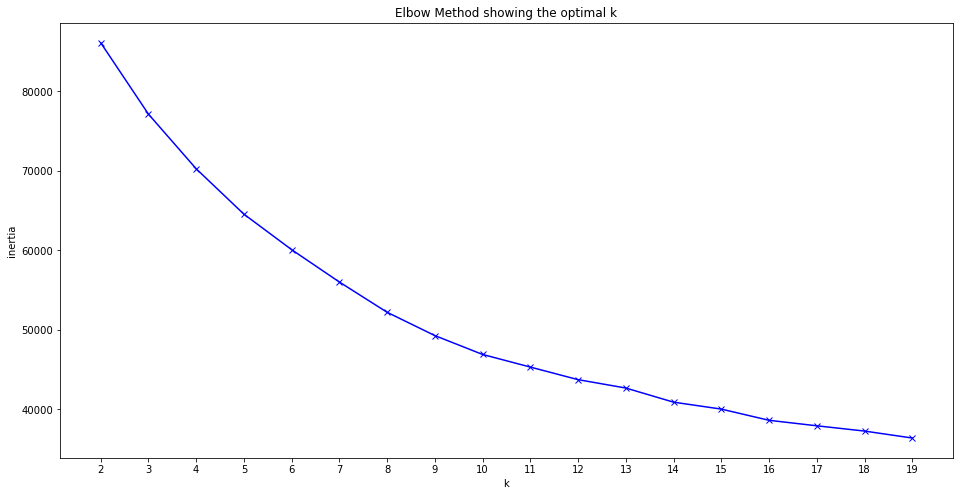

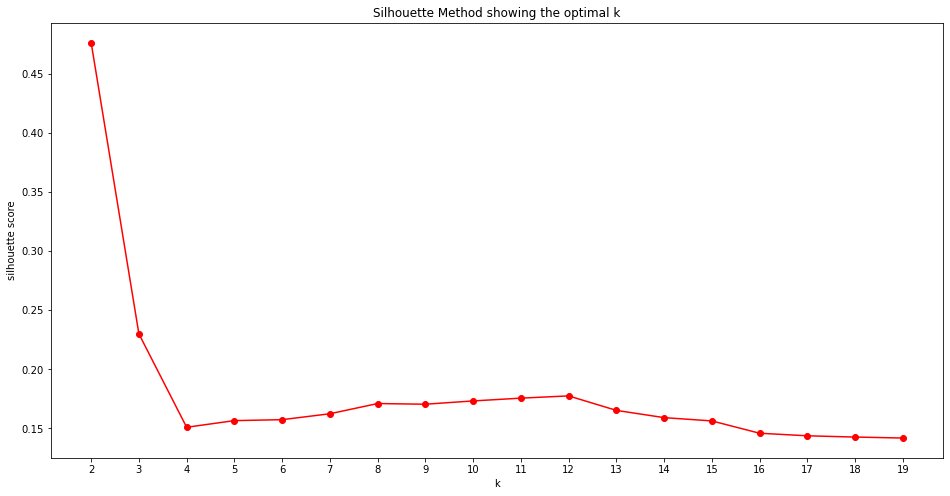

In [690]:
# Checking what K might be better
from tqdm import tqdm as tqdm
import time

# Inertia approach - one might risk saying the elob is at n = 9  actually
K = range(2, 20)
inertia = []

for k in tqdm(K,desc='Inertia'):
    kmeans = KMeans(n_clusters=k,
                    random_state=1337)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# Silhouette approach - we cannot go with just two buckets, that wouldn't be a useful recommender. Among the n < 20, 9, 10 and 11 are quite comparable
K = range(2, 20)
silhouette = []

for k in tqdm(K,desc='Silhouette'):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'ro-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [691]:
# Agglomerative clustering approach - slightly higher than Kmeans, single is a lot but uses only 1 cluster basically...

from sklearn import cluster

agglomerative_complete = cluster.AgglomerativeClustering(n_clusters=10,linkage='complete')
pred = agglomerative.fit_predict(X_prep)

agglomerative_ward = cluster.AgglomerativeClustering(n_clusters=10,linkage='ward')
pred = agglomerative.fit_predict(X_prep)

agglomerative_single = cluster.AgglomerativeClustering(n_clusters=10,linkage='single')
pred = agglomerative.fit_predict(X_prep)

# print('Inertia:',round(agglomerative.inertia_))
print('Silhouette Score (Complete):',round(silhouette_score(X_prep, agglomerative_complete.fit_predict(X_prep)),3))
print('Silhouette Score (Ward):',round(silhouette_score(X_prep, agglomerative_ward.fit_predict(X_prep)),3))
print('Silhouette Score (Single):',round(silhouette_score(X_prep, agglomerative_single.fit_predict(X_prep)),3))


Silhouette Score (Complete): 0.129
Silhouette Score (Ward): 0.124
Silhouette Score (Single): 0.369


Silhouette: 100%|██████████| 18/18 [02:33<00:00,  8.53s/it]


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

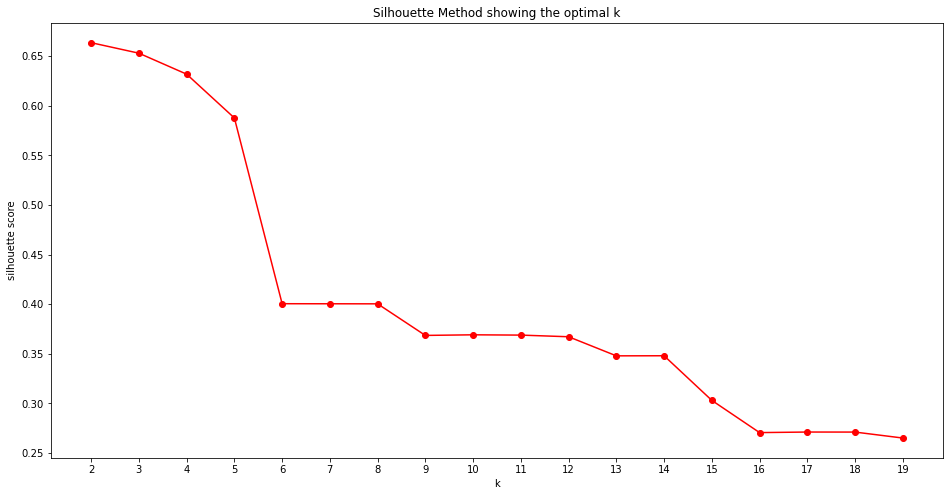

In [692]:
# Let's see how far can we go with agglomerative (single), changing the number of clusters

K = range(2, 20)
silhouette = []

for k in tqdm(K,desc='Silhouette'):
    
    agglomerative_single = cluster.AgglomerativeClustering(n_clusters=k,linkage='single')
    pred = agglomerative.fit_predict(X_prep)
    silhouette.append(silhouette_score(X_prep, agglomerative_single.fit_predict(X_prep)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'ro-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

# Increasing the number of clusters to 10 will not have an adverse impact on silhouette score but can result in better matching
# Alternatively, 5 clusters have a much higher score (almost 0.6) but may limit the recommendations greatly.

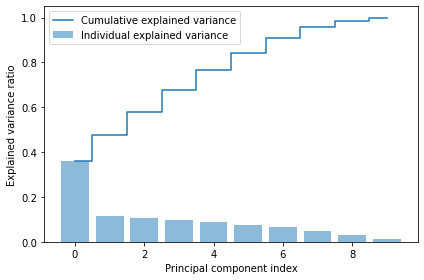

Variance covered with 4 PCAs: 0.68


In [693]:
# PCA Analysis

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_prep)

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print('Variance covered with 4 PCAs:',round(pca.explained_variance_ratio_[:4].sum(),2)) # With 4 features out of 10, we get 68% variance explanation

pca = PCA(2)
pca.fit(X_prep)

X_prep_pca = pca.transform(X_prep)

In [694]:
# Apply PCA features back to agglomerative (single) - we can get from 0.4 to 0.43 with 4 PCAs, not worth it

agglomerative_single = cluster.AgglomerativeClustering(n_clusters=10,linkage='single')
pred = agglomerative.fit_predict(X_prep_pca)
print('Silhouette Score (Single):',round(silhouette_score(X_prep_pca, agglomerative_single.fit_predict(X_prep_pca)),3))

Silhouette Score (Single): 0.428


In [695]:
# Testing other models
# MeanShift - very slow and low, many clusters created
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=3).fit(X_prep)
print('Silhouette Score (MeanShift):',round(silhouette_score(X_prep, meanshift.predict(X_prep)),3))
pd.Series(meanshift.labels_).value_counts()

Silhouette Score (MeanShift): 0.23


0     9723
1      864
2      245
3      230
21     139
      ... 
26       1
19       1
27       1
25       1
22       1
Length: 28, dtype: int64

In [696]:
# # SpectralClustering  - takes too long to run
# from sklearn.cluster import SpectralClustering

# spectral = SpectralClustering(n_clusters=2,assign_labels='discretize',random_state=0).fit(X_prep)
# print('Silhouette Score (SpectralClustering):',round(silhouette_score(X_prep, spectral.fit_predict(X_prep)),3))

In [697]:
# DBSCAN - lower than agglomerative, quite fast but still only one cluster mainly
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=2).fit(X_prep)
print('Silhouette Score (DBSCAN):',round(silhouette_score(X_prep, dbscan.fit_predict(X_prep)),3))
pd.Series(dbscan.labels_).value_counts()

Silhouette Score (DBSCAN): 0.294


 0     11078
 1       479
 2       128
 3        18
 6        12
-1         9
 11        7
 7         4
 5         4
 10        4
 9         3
 14        2
 13        2
 12        2
 4         2
 8         2
dtype: int64

In [698]:
# OPTICS - lower than agglomerative but pretty close, quite slow, 3.5k clusters
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=2).fit(X_prep)
print('Silhouette Score (OPTICS):',round(silhouette_score(X_prep, optics.fit_predict(X_prep)),3))
pd.Series(optics.labels_).value_counts()

/Users/Arek/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/Arek/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Silhouette Score (OPTICS): 0.375


-1       3015
 696       19
 3244      12
 3166      11
 1441       9
         ... 
 1004       2
 996        2
 3037       2
 988        2
 0          2
Length: 3349, dtype: int64

In [699]:
# BIRCH - very fast but very low
from sklearn.cluster import Birch

birch = Birch(n_clusters=10).fit(X_prep)
print('Silhouette Score (BIRCH):',round(silhouette_score(X_prep, birch.predict(X_prep)),3))

Silhouette Score (BIRCH): 0.105


In [700]:
# GaussianMixture - fast & low
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5, random_state=0).fit(X_prep)
print('Silhouette Score (GaussianMixtures):',round(silhouette_score(X_prep, gm.predict(X_prep)),3))
pd.Series(gm.predict(X_prep)).value_counts()

Silhouette Score (GaussianMixtures): 0.134


2    8247
0    2637
3     344
1     294
4     234
dtype: int64

In [701]:
# Same as above models, but with PCA now instead
# Meanshift (PCA) - almost same as agglomerative without PCA, 7 clusters but one cluster is huge compared to others

meanshift = MeanShift(bandwidth=2).fit(X_prep_pca)
print('Silhouette Score (Meanshift):',round(silhouette_score(X_prep_pca, meanshift.predict(X_prep_pca)),3))
pd.Series(meanshift.labels_).value_counts()

Silhouette Score (Meanshift): 0.671


0    10578
1     1178
dtype: int64

In [704]:
# good result but 3572 clusters.. will pass on it
optics = OPTICS(min_samples=2).fit(X_prep_pca)
print('Silhouette Score (OPTICS):',round(silhouette_score(X_prep_pca, optics.fit_predict(X_prep_pca)),3))
pd.Series(optics.labels_).value_counts()

/Users/Arek/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/Arek/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Silhouette Score (OPTICS): 0.565


-1       1214
 1656      18
 3555      13
 3689      11
 3427       9
         ... 
 2893       2
 844        2
 2885       2
 836        2
 0          2
Length: 3738, dtype: int64

In [705]:
# the only model comparable to kmeans
birch = Birch(n_clusters=10).fit(X_prep_pca)
print('Silhouette Score (BIRCH):',round(silhouette_score(X_prep_pca, birch.predict(X_prep_pca)),3))
pd.Series(birch.labels_).value_counts()

Silhouette Score (BIRCH): 0.18


0    8505
8    1135
1     647
4     481
2     335
7     261
9     175
6     172
5      25
3      20
dtype: int64

In [706]:
# second contender to kmeans
gm = GaussianMixture(n_components= 9, random_state=16).fit(X_prep_pca)
print('Silhouette Score (GaussianMixtures):',round(silhouette_score(X_prep_pca, gm.predict(X_prep_pca)),3))
pd.Series(gm.predict(X_prep_pca)).value_counts()

Silhouette Score (GaussianMixtures): 0.316


0    3096
3    2281
8    1640
6    1341
4    1034
2     717
5     706
1     593
7     348
dtype: int64

Silhouette: 100%|██████████| 98/98 [05:31<00:00,  3.39s/it]


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

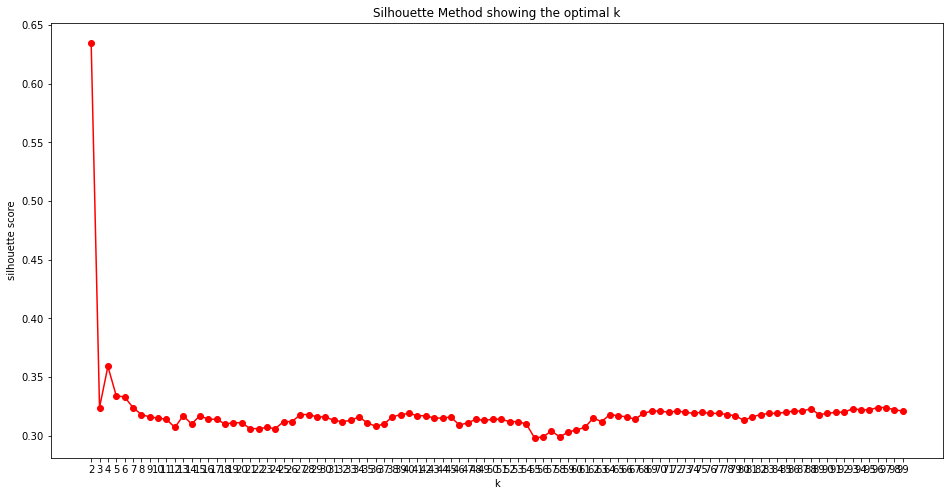

In [727]:
# Trying with different clusters for the chosen model

K = range(2, 100)
silhouette = []

for k in tqdm(K,desc='Silhouette'):    
    best_model = GaussianMixture(n_components= k, random_state=16).fit(X_prep_pca)   
    silhouette.append(round(silhouette_score(X_prep_pca, best_model.predict(X_prep_pca)),3))
    
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'ro-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [729]:
# Model Selection
# Given the results of different models & PCA mix, the best results are returned by GaussianMixture model with:

# 1. 9 components (= clusters) (I might be experimenting with other number of clusters as well)
# 2. PCA reduction to only PCA(2)
# 3. Random state of 16

# It then achieves a silhouette score of 0.325, much higher than 0.17 from Kmeans, with pretty uniform distribution of songs in the clusters

best_model = GaussianMixture(n_components= 100, random_state=16).fit(X_prep_pca)
print('Silhouette Score (GaussianMixtures):',round(silhouette_score(X_prep_pca, best_model.predict(X_prep_pca)),3))
pd.Series(best_model.predict(X_prep_pca)).value_counts()

Silhouette Score (GaussianMixtures): 0.322


79    390
22    342
0     336
13    311
62    307
     ... 
94     10
50     10
86      8
91      5
47      2
Length: 100, dtype: int64

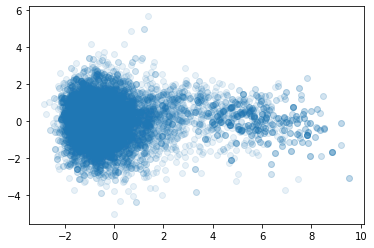

In [708]:
# Visualization of the PCA1 & PCA2 

plt.scatter(X_prep_pca[:,0],X_prep_pca[:,1], alpha = 0.1)

In [738]:
# Assigning these clusters to the track list, so we can pick a song later on

pred = pd.Series(best_model.predict(X_prep_pca))
database = pd.concat([database,pred], axis = 1)
database = database.rename(columns={0: 'cluster'})
database.to_csv('db.csv', index=False)

In [731]:
import pickle

# Saving scaler
scaler_saved = 'scaler_saved.sav'
pickle.dump(scaler, open(scaler_saved, 'wb'))

# Saving PCA
pca_saved = 'pca_saved.sav'
pickle.dump(pca, open(pca_saved, 'wb'))

# Saving main model
best_model_saved = 'best_model_saved.sav'
pickle.dump(best_model, open(best_model_saved, 'wb'))

In [ ]:
database